In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(cancer['DESCR'])


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.



In [4]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()
Y = cancer.target

In [5]:
from sklearn.preprocessing import StandardScaler


In [6]:
scaler = StandardScaler()
scaler.fit(df) #Rescalling all the values in the same scale
scaled_data = scaler.transform(df) #with transform all the values are converted to the same scale


In [ ]:
#You can use the following command for data scalling
#from sklearn.preprocessing import scale # For Data Scaling
#scaled_data = scale(df)


PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object, here it s 4.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)


In [8]:
pca.fit(scaled_data) # we need only our features, since PCA is an unsupervised learning techniques and it doesn't need lables to learn
# we will cluster data based on similarity and based on eigen value


PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
x_pca = pca.transform(scaled_data)
#let s check the shape of our data before and after applying PCa

In [10]:
scaled_data.shape


(569, 30)

In [11]:
x_pca.shape


(569, 4)

In [12]:
scores_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3','PC4'])
scores_df

,PC1,PC2,PC3,PC4
0,9.192837,1.948583,-1.123166,3.633732
1,2.387802,-3.768172,-0.529293,1.118264
2,5.733896,-1.075174,-0.551748,0.912083
3,7.122953,10.275589,-3.232790,0.152547
4,3.935302,-1.948072,1.389766,2.940641
...,...,...,...,...
564,6.439315,-3.576817,2.459486,1.177316
565,3.793382,-3.584048,2.088476,-2.506028
566,1.256179,-1.902297,0.562731,-2.089228
567,10.374794,1.672010,-1.877029,-2.356031


Text(0, 0.5, 'Second Principal Component')

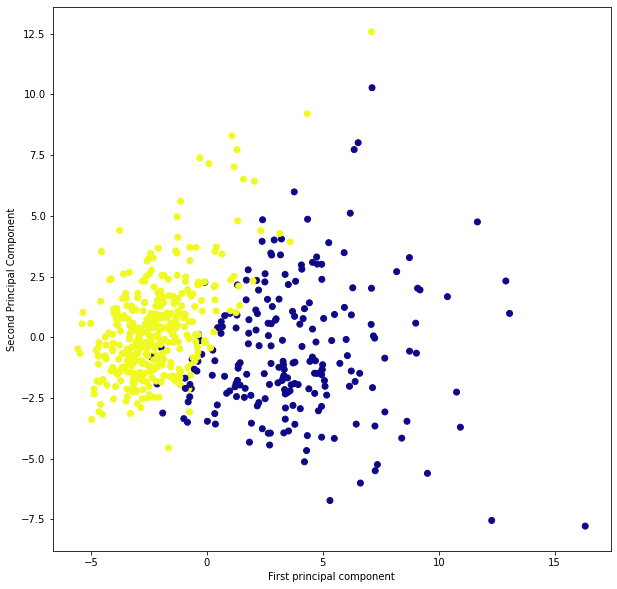

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

So, for so far, we did the following steps:

1- Standar Sclling


2- Apply PCA

3- convert our data from 30 dimension to 4 dimension.

Now we can apply Decision tree, k means ... on our new dataset.
What we did is part of data preprocessing.

# Interpreting the components

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:



In [13]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])


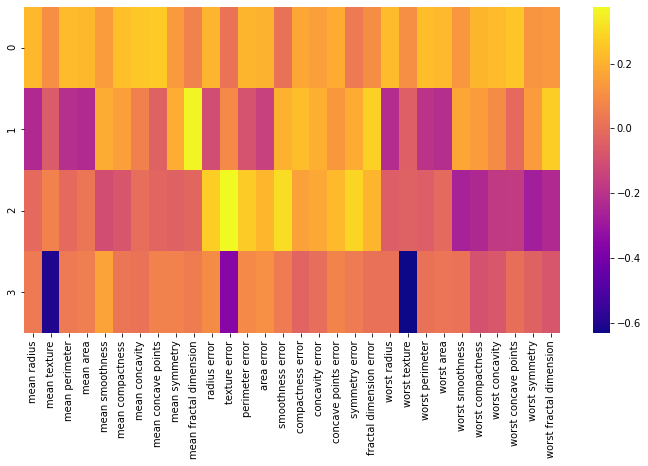

In [14]:

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.



Hopefully this information is useful to you when dealing with high dimensional data!



In [15]:

import plotly.express as px

In [16]:
#let s see the explained variance
#it will tell us what is the contribution of each PC, ie, how much each pc contributes to the overall variance of the data set
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.44272026, 0.18971182, 0.09393163, 0.06602135])

In [17]:
explained_variance = np.insert(explained_variance, 0, 0) # to force the values to start from 0


In [18]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3)) # at each point of the graph show the cumultative variance


In [19]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [20]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.442720,0.443
2,PC2,0.189712,0.633
3,PC3,0.093932,0.727
4,PC4,0.066021,0.793


In [27]:
fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()